## Index
1. Dataset Information & Libraries
2. Descriptive Statistics
3. Modelling

# 1 - Dataset Information

### Source:

#### Creators:

1. Dr. William H. Wolberg, General Surgery Dept.
University of Wisconsin, Clinical Sciences Center
Madison, WI 53792
wolberg '@' eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

#### Donor:

Nick Street


### Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

    
### Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

## Import libraries for ML

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import mpld3 as mpl


#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Enseble Methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



# models helpers and metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [2]:
def grid_search(model, param_grid, X_train):
    scaler = StandardScaler().fit(X_train)
    rescaledX = scaler.transform(X_train)    
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=10, verbose=1 )
    grid_result = grid.fit(rescaledX, Y_train)
    
    
    print(f"Best score:{grid_result.best_score_} - K: {grid_result.best_params_}")
    print(f"Best estimator: {grid_result.best_estimator_}")

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']

### Import Dataset

In [3]:
data = pd.read_csv('./data.csv')

# 2- Descriptive Statistics

### First 5 rows

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Dimentions

In [6]:
data.shape

(569, 32)

### Data Types

In [7]:
data.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Statistics Summary

In [8]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Class Distribution

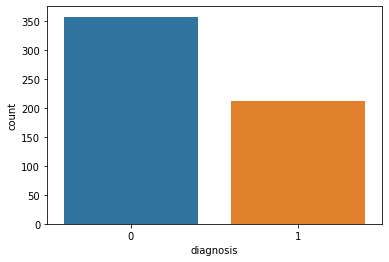

In [9]:
plt.figure()
sns.countplot(x=data['diagnosis'],label="Count")
plt.show()

In [10]:
features_mean=list(data.columns[1:11])
# features_mean.remove('diagnosis')
# split dataframe into two based on diagnosis
dataM=data[data['diagnosis'] ==1]
dataB=data[data['diagnosis'] ==0]

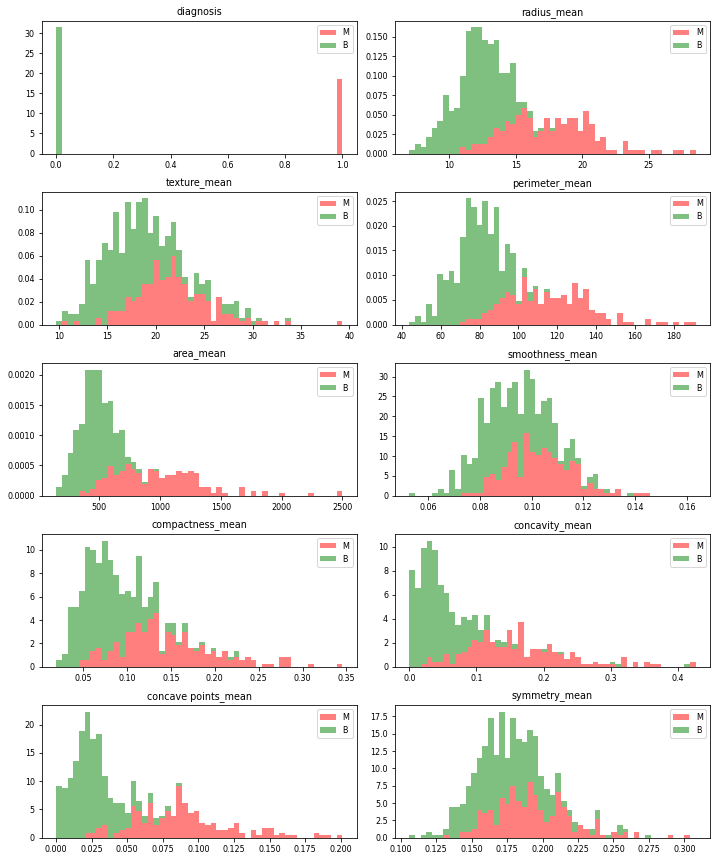

In [11]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dataM[features_mean[idx]],dataB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

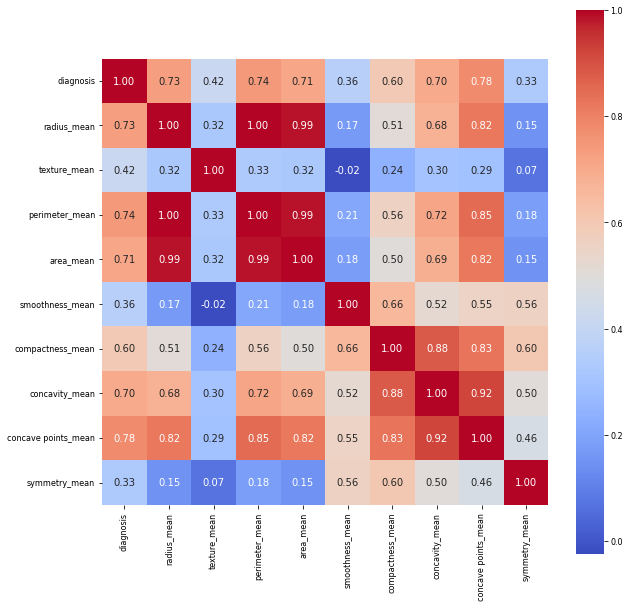

In [12]:
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')
plt.show()

- El radio, perímetro y area se encuentran altamente correlacionados, por lo tanto, usaremos cualquiera de ellos
- compactness_mean, concavity_mean y concavepoint_mean se encuentran altamente realcionados, tomaremos compactness_mean

#### Splitting data into train-test

In [13]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
X_train = train[[value for value in features_mean if value != "diagnosis"]]
Y_train = train['diagnosis']

## Models Trainind and Evaluation

In [14]:
models = []
models.append(('LogC', LogisticRegression(solver='lbfgs', max_iter=400)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('NB', GaussianNB()))

In [15]:
results = []
names = []
num_folds = 10
seed = 7
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'Evaluated: {name} - {cv_results.mean()} - {cv_results.std()}'
    print(msg)

Evaluated: LogC - 0.8918589743589743 - 0.05036687395610782
Evaluated: DTC - 0.9271794871794873 - 0.03430559381876929
Evaluated: KNN - 0.8541025641025641 - 0.03616680073417011
Evaluated: SVC - 0.8667307692307691 - 0.025826970012240116
Evaluated: NB - 0.902179487179487 - 0.043713248863848385


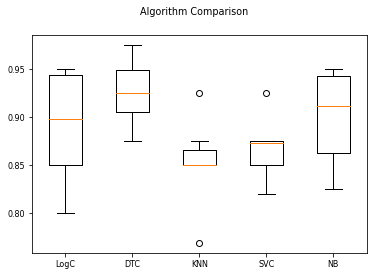

In [16]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Let's try to improve performance scaling dataset

In [17]:
pipelines = []

pipelines.append(('ScaledLogC', Pipeline([
    ('Scaler', StandardScaler()),
    ('LogC', LogisticRegression(solver='lbfgs', max_iter=400))
])))

pipelines.append(('ScaledDT', Pipeline([
    ('Scaler', StandardScaler()),
    ('DT', DecisionTreeClassifier())
])))

pipelines.append(('ScaledKNN', Pipeline([
    ('Scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier())
])))

pipelines.append(('ScaledSVC', Pipeline([
    ('Scaler', StandardScaler()),
    ('SCV', SVC())
])))

pipelines.append(('ScaledNB', Pipeline([
    ('Scaler', StandardScaler()),
    ('NB', GaussianNB())
])))

In [18]:
results = []
names = []
num_folds = 10
seed = 7
scoring = 'accuracy'

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'Evaluated: {name} - {cv_results.mean()} - {cv_results.std()}'
    print(msg)

Evaluated: ScaledLogC - 0.9371794871794872 - 0.0465968765266314
Evaluated: ScaledDT - 0.9271794871794873 - 0.039393829050479244
Evaluated: ScaledKNN - 0.9321794871794872 - 0.04189366175763955
Evaluated: ScaledSVC - 0.9523076923076923 - 0.034339115960433736
Evaluated: ScaledNB - 0.9071794871794872 - 0.04170195744132247


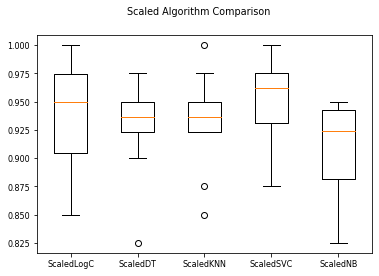

In [19]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Improving KNN with Grid Search
I'm trying to get the best number of neightbours for the model.

In [20]:
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()

grid_search(model, param_grid, X_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
Best score:0.9471794871794872 - K: {'n_neighbors': 21}
Best estimator: KNeighborsClassifier(n_neighbors=21)


### Improving SVC with Grid Search

Trying to get the best number of gamma

In [21]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
model = SVC()
grid_search(model, param_grid, X_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best score:0.9598076923076923 - K: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator: SVC(C=1000, gamma=0.01)


Looks like the best number of neightbours is 7

In [22]:
pipelines = []

pipelines.append(('ScaledLogC', Pipeline([
    ('Scaler', StandardScaler()),
    ('LogC', LogisticRegression(solver='lbfgs', max_iter=400))
])))

pipelines.append(('ScaledDT', Pipeline([
    ('Scaler', StandardScaler()),
    ('DT', DecisionTreeClassifier())
])))

pipelines.append(('ScaledKNN', Pipeline([
    ('Scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier(n_neighbors=7))
])))

pipelines.append(('ScaledSVC', Pipeline([
    ('Scaler', StandardScaler()),
    ('SCV', SVC(C=1, gamma=0.1))
])))

pipelines.append(('ScaledNB', Pipeline([
    ('Scaler', StandardScaler()),
    ('NB', GaussianNB())
])))

In [23]:
results = []
names = []
num_folds = 10
seed = 7
scoring = 'accuracy'

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'Evaluated: {name} - {cv_results.mean()} - {cv_results.std()}'
    print(msg)

Evaluated: ScaledLogC - 0.9371794871794872 - 0.0465968765266314
Evaluated: ScaledDT - 0.9146794871794872 - 0.04198346039508371
Evaluated: ScaledKNN - 0.9348076923076922 - 0.0405116540727893
Evaluated: ScaledSVC - 0.9473076923076922 - 0.036086726202594746
Evaluated: ScaledNB - 0.9071794871794872 - 0.04170195744132247


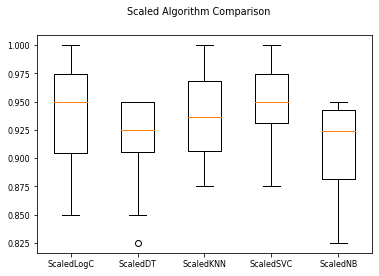

In [24]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Enseble Methods for Classification

In [25]:
ensembles = []

ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostClassifier())])))

ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ETC',
ExtraTreesClassifier())])))

ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RFC',
RandomForestClassifier())])))

# ensembles.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB',
# xgb.XGBClassifier(objective="binary:logistic"))])))


In [26]:
results = []
names = []
num_folds = 10
seed = 7
scoring = 'accuracy'

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f'Evaluated: {name} - {cv_results.mean()} - {cv_results.std()}'
    print(msg)

Evaluated: ScaledAB - 0.9473076923076922 - 0.02832404999326611
Evaluated: ScaledET - 0.9396794871794871 - 0.03396522615516055
Evaluated: ScaledRF - 0.9346794871794872 - 0.03202235874457211


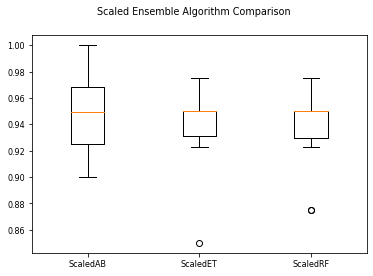

In [27]:
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Let's try to grid search Random Forest hyperparameters

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

grid_search(model, param_grid, X_train)

Fitting 10 folds for each of 4320 candidates, totalling 43200 fits
